In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib import cm
import os

In [2]:
fix_lag4 = np.load("../../output/FIX_LAG/exp_synthetic_model_1/smc_t_l1_h1_d32_10p_lag4/20220401-102507/resampled_particles_preds_test.npy")
fix_lag8 = np.load("../../output/FIX_LAG/exp_synthetic_model_1/smc_t_l1_h1_d32_10p_lag8/20220401-111349/resampled_particles_preds_test.npy")
fix_lag12 = np.load("../../output/FIX_LAG/exp_synthetic_model_1/smc_t_l1_h1_d32_10p_lag12/20220401-120239/resampled_particles_preds_test.npy")
fix_lag16=np.load("../../output/FIX_LAG/exp_synthetic_model_1/smc_t_l1_h1_d32_10p_lag16/20220401-125044/resampled_particles_preds_test.npy")
fix_lag20=np.load("../../output/FIX_LAG/exp_synthetic_model_1/smc_t_l1_h1_d32_10p_lag20/20220401-135340/resampled_particles_preds_test.npy")
fix_lag24=np.load("../../output/FIX_LAG/exp_synthetic_model_1/smc_t_l1_h1_d32_10p_lag24/20220401-144413/resampled_particles_preds_test.npy")
#ess = np.load("../../output/ESS/exp_synthetic_model_1/smc_t_l1_h1_d32_10p_ESS/20220401-153903/resampled_particles_preds_test.npy")
ess = np.load("../../output/ESS/ESS_cv/exp_synthetic_model_1/smc_t_l1_h1_d32_10p_ESS/20220401-172350/resampled_particles_preds_test.npy")

In [3]:
print("fix lag 4", fix_lag4.shape)
print("fix lag 8", fix_lag8.shape)
print("ESS", ess.shape)

fix lag 4 (32, 10, 24, 1)
fix lag 8 (32, 10, 24, 1)
ESS (32, 10, 24, 1)


In [4]:
#covid_truth = np.load("../../data/covid/test/covid.npy")
#covid_truth = covid_truth[:,:-1,:]
#covid_truth.shape

In [5]:
def get_unique_arrays(array, index):
    array = np.squeeze(array)
    list_unique_arrays = []
    list_indexes = []
    list_counts = []
    arr = array[index]
    num_timesteps = array.shape[2]
    for t in range(num_timesteps):
        unique_arr, indexes, counts = np.unique(arr[:,t], return_index=True, return_counts=True)
        list_unique_arrays.append(unique_arr)
        list_indexes.append(indexes)
        list_counts.append(counts)
    return list_unique_arrays, list_indexes, list_counts

In [6]:
def get_mean_num_particles(array):
    all_counts = np.zeros(shape=(array.shape[0], array.shape[2]))
    for index in range(array.shape[0]):
        arr,_,_ = get_unique_arrays(array, index)
        num_unique_particles = [ar.shape[0] for ar in arr]
        all_counts[index] = np.array(num_unique_particles)
    return np.round(np.mean(all_counts, axis=0)), np.std(all_counts, axis=0)

In [7]:
mean_4, std_4 = get_mean_num_particles(fix_lag4)
mean_8, std_8 = get_mean_num_particles(fix_lag8)
mean_12, std_12 = get_mean_num_particles(fix_lag12)
mean_16, std_16 = get_mean_num_particles(fix_lag16)
mean_20, std_20 = get_mean_num_particles(fix_lag20)
mean_24, std_24 = get_mean_num_particles(fix_lag24)
mean_ess, std_ess = get_mean_num_particles(ess)
#means = [mean_4]
#stds = [std_4]

In [8]:
print("fix lag 4", mean_4)
print("fix lag 8", mean_8)
print("fix lag 12", mean_12)
print("fix lag 16", mean_16)
print("fix lag 20", mean_20)
print("fix lag 24", mean_24)
print("ESS", mean_ess)
print("std_ESS", std_ess)

fix lag 4 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 4. 4. 5. 7.]
fix lag 8 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 4. 4. 5. 6.]
fix lag 12 [1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 4. 5. 6.]
fix lag 16 [1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 4. 4. 5. 7.]
fix lag 20 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 4. 4. 5. 7.]
fix lag 24 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 3. 3. 3. 4. 5. 6.]
ESS [10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10.]
std_ESS [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
def plot_statistics(mean, std, x_max=24, particles=10, color='blue', title=None):
    fig, ax = plt.subplots(figsize=(7, 5))
    x = np.linspace(-1,-mean.shape[0],mean.shape[0])
    ax.set_xlim(-1, -x_max)
    reversed_mean = np.array(list(reversed(mean)))
    reversed_std = np.array(list(reversed(std)))
    low_b = reversed_mean-1.87*reversed_std
    upper_b = reversed_mean+1.87*reversed_std
    ax.plot(x, reversed_mean, color=color, alpha=0.8)
    ax.fill_between(x, low_b, upper_b, alpha=0.3, facecolor=color, edgecolor=color)
    ax.hlines(particles/2, -1, -x_max, colors=color, linestyles='dashed', label='half line')
    ax.hlines(particles/6, -1, -x_max, colors=color, linestyles='dotted', label='1/6 line')
    ax.legend(fontsize=14, loc='upper left')
    ax.yaxis.set_ticks_position('both')
    ax.set_xlabel("timesteps", size=14)
    ax.set_ylabel("unique particles per timestep", size=14)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14, labelright=True)
    ax.grid('on', alpha=0.5)
    if title is not None:
        ax.set_title(title)
    fig.tight_layout()
    #plt.savefig(os.path.join("../../output/plots", "particles_analysis_60p_covid.pdf"), bbox_inches="tight")
    plt.show()

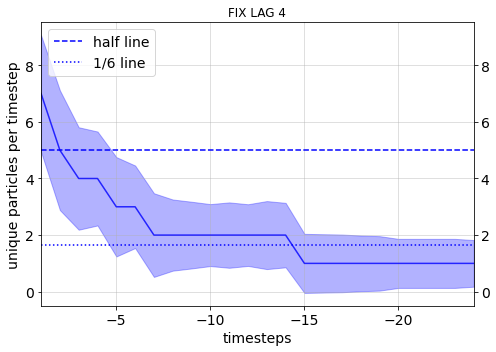

In [10]:
plot_statistics(mean_4, std_4, title="FIX LAG 4")

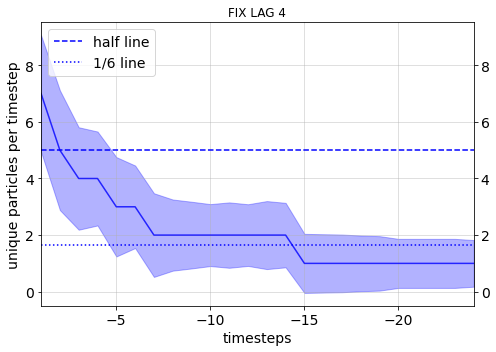

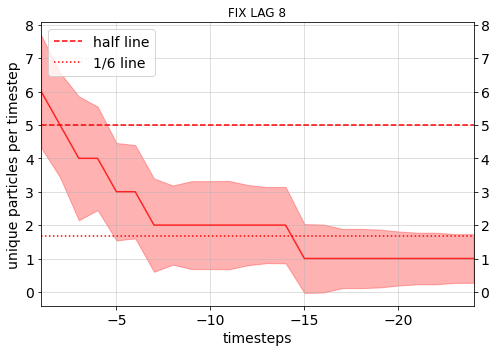

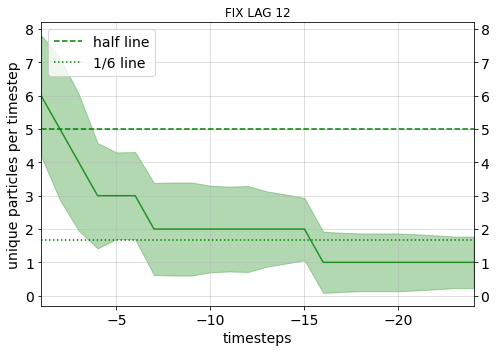

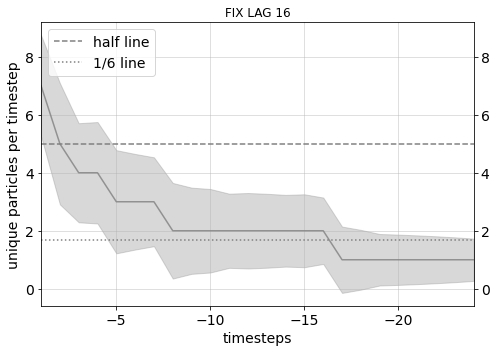

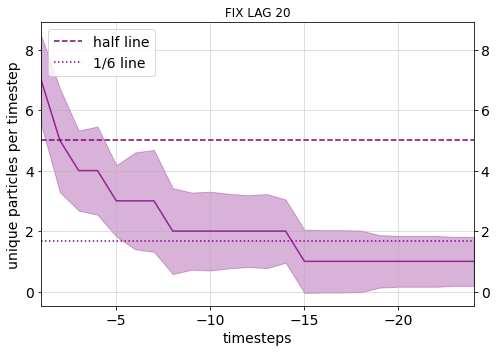

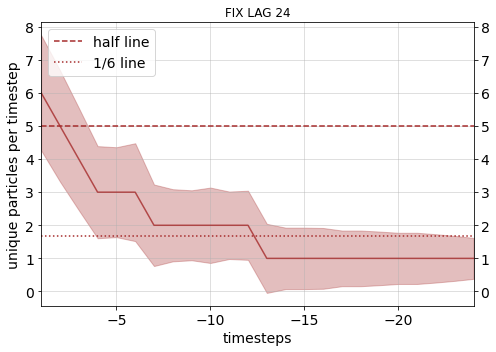

In [11]:
plot_statistics(mean_4, std_4, title="FIX LAG 4")
plot_statistics(mean_8, std_8, title="FIX LAG 8", color="red")
plot_statistics(mean_12, std_12, title="FIX LAG 12", color="green")
plot_statistics(mean_16, std_16, title="FIX LAG 16", color="gray")
plot_statistics(mean_20, std_20, title="FIX LAG 20", color="purple")
plot_statistics(mean_24, std_24, title="FIX LAG 24", color="brown")

In [12]:
def plot_multiple_statistics(means, colors, labels, eps=0.1, x_max=24, particles=10, title=None):
    fig, ax = plt.subplots(figsize=(10, 10))
    #x = np.linspace(-1,-x_max,x_max)
    ax.set_xlim(-1+eps*len(means), -x_max)
    for i, (color, mean, label) in enumerate(zip(colors, means, labels)):
        x = np.linspace(-1+eps*i,-x_max+eps*i,x_max)
        reversed_mean = np.array(list(reversed(mean)))
        ax.plot(x, reversed_mean, color=color, alpha=0.8, label=label)
    ax.hlines(particles/2, -1, -x_max, colors="black", linestyles='dashed', label='half line')
    ax.hlines(particles/6, -1, -x_max, colors="black", linestyles='dotted', label='1/6 line')
    ax.legend(fontsize=14, loc='upper right')
    ax.yaxis.set_ticks_position('both')
    ax.set_xlabel("timesteps", size=14)
    ax.set_ylabel("unique particles per timestep", size=14)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14, labelright=True)
    ax.grid('on', alpha=0.5)
    if title is not None:
        ax.set_title(title)
    fig.tight_layout()
    #plt.savefig(os.path.join("../../output/plots", "particles_analysis_60p_covid.pdf"), bbox_inches="tight")
    plt.show()

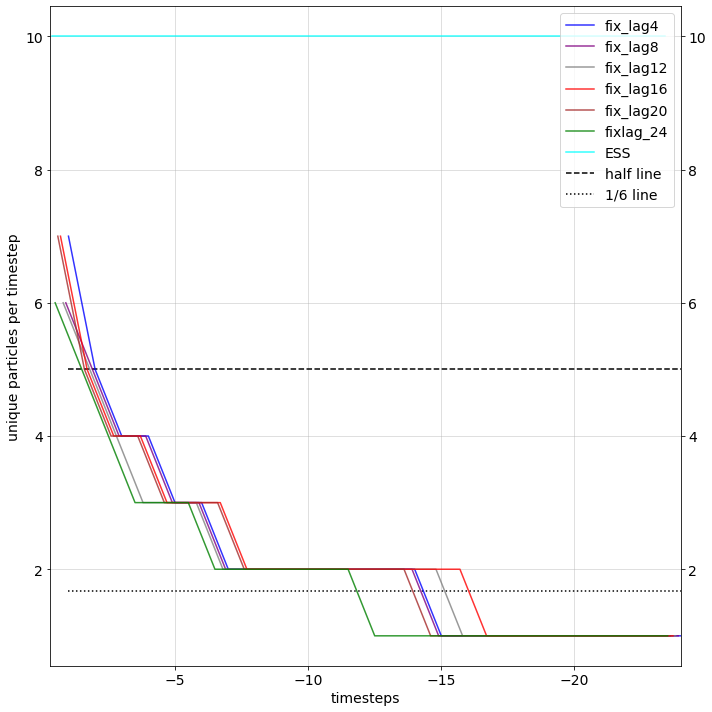

In [13]:
means = [mean_4, mean_8, mean_12, mean_16, mean_20, mean_24, mean_ess]
colors = ["blue", "purple", "gray", "red", "brown", "green", "cyan"]
labels = ["fix_lag4", "fix_lag8", "fix_lag12","fix_lag16", "fix_lag20", "fixlag_24", "ESS"]
plot_multiple_statistics(means, colors, labels)

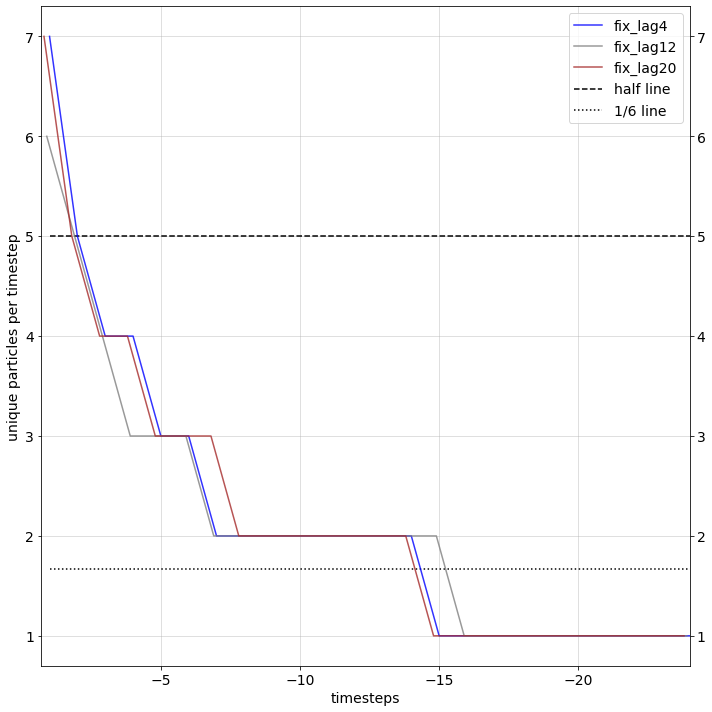

In [95]:
means = [mean_4, mean_12, mean_20]
colors = ["blue", "gray","brown"]
labels = ["fix_lag4","fix_lag12", "fix_lag20"]
plot_multiple_statistics(means, colors, labels)

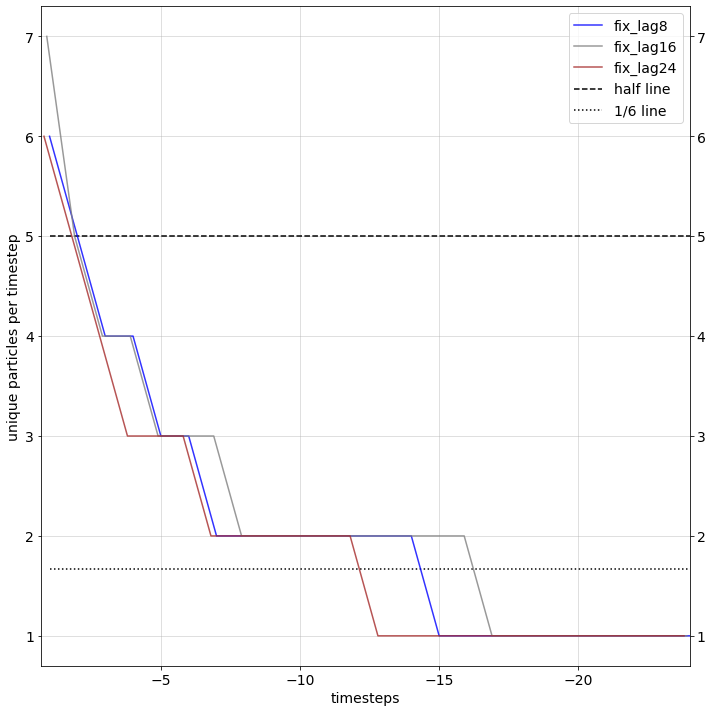

In [96]:
means = [mean_8, mean_16, mean_24]
colors = ["blue", "gray","brown"]
labels = ["fix_lag8","fix_lag16", "fix_lag24"]
plot_multiple_statistics(means, colors, labels)